# Car Data Analysis

 The owner of a car showroom handles a variety of car types and models. This dataset
 includes a range of features for each car, corresponding to the models present in the
 showroom. The price of each car is determined by its unique attributes. Our objective is to
 examine these various car features and understand how they influence the car's pricing.

### Perform EDA on the given dataset.

Import Important Libraries for Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the CSV File

In [4]:
car = pd.read_csv('CarFeatures (1).csv')

In [5]:
car.head()

,Make,Fuel Type,Aspiration,Number of Doors,Body Style,Drive Wheels,Engine Location,Number of Cylinders,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Horsepower,City MPG,Highway MPG,Price
0,Toyota,Diesel,Std,Two,Convertible,Fwd,Front,Twelve,95.1,175.9,60.6,59.4,1758,252,279,40,41,5272
1,Mitsubishi,Diesel,Std,Four,Convertible,Fwd,Rear,Four,91.7,153.9,60.5,55.1,1887,95,150,32,42,31393
2,Chevrolet,Gas,Turbo,Four,Hatchback,Rwd,Front,Two,116.2,203.5,65.3,58.5,3815,231,129,13,41,40450
3,Mitsubishi,Gas,Turbo,Four,Hatchback,Fwd,Front,Three,112.8,154.3,64.9,51.4,3367,106,230,39,21,37881
4,Mercedes,Gas,Std,Four,Sedan,Rwd,Rear,Two,115.1,143.4,62.6,49.6,3433,294,96,46,52,18087


In [6]:
#checking null values
car.isnull().sum()

Make                   0
Fuel Type              0
Aspiration             0
Number of Doors        0
Body Style             0
Drive Wheels           0
Engine Location        0
Number of Cylinders    0
Wheel Base             0
Length                 0
Width                  0
Height                 0
Curb Weight            0
Engine Size            0
Horsepower             0
City MPG               0
Highway MPG            0
Price                  0
dtype: int64

In [7]:
car.shape

(25, 18)

1. .Summarize the data using descriptive statistics

In [8]:
car.describe()

,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Horsepower,City MPG,Highway MPG,Price
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,105.736000,173.928000,65.868000,52.680000,2907.720000,192.360000,168.760000,29.720000,37.640000,22684.920000
std,9.046403,18.508523,3.632804,3.623534,777.650924,79.342548,73.189981,10.659581,10.664896,10684.205266
min,91.700000,143.400000,60.500000,47.800000,1488.000000,79.000000,50.000000,13.000000,16.000000,5272.000000
25%,96.000000,161.400000,62.500000,50.000000,2108.000000,106.000000,100.000000,24.000000,30.000000,14838.000000
50%,106.800000,172.400000,66.300000,51.800000,3231.000000,199.000000,168.000000,29.000000,41.000000,18524.000000
75%,113.900000,187.800000,68.500000,55.100000,3433.000000,252.000000,231.000000,38.000000,45.000000,31393.000000
max,119.600000,207.600000,71.500000,59.800000,3922.000000,319.000000,288.000000,49.000000,53.000000,40466.000000


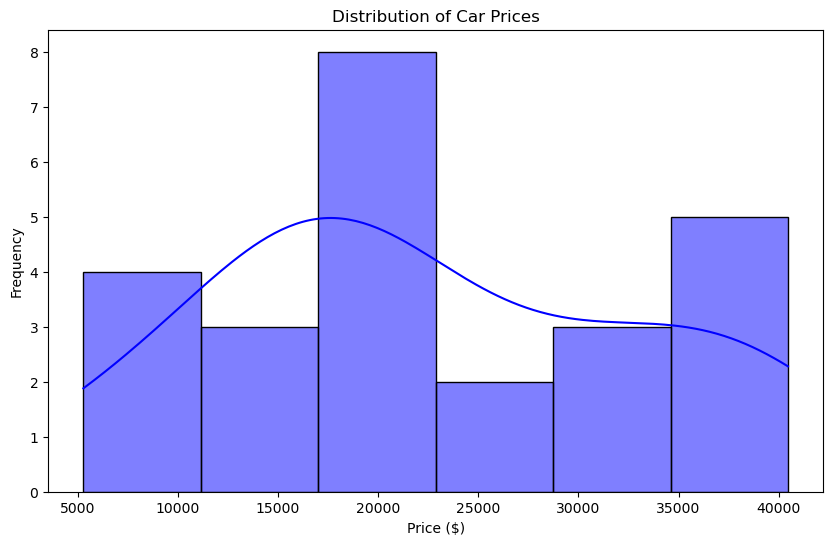

In [53]:
# Distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(car['Price'], kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

2. Identify the costliest car and the cheapest car by average price.

In [9]:
#Group by make and calculate the average price
Grouped_car_avg_price = car.groupby('Make')['Price'].mean().reset_index()
Grouped_car_avg_price

,Make,Price
0,Audi,27944.333333
1,BMW,20076.750000
2,Chevrolet,40450.000000
3,Ford,8246.500000
4,Honda,14109.000000
5,Mazda,18685.666667
6,Mercedes,22832.000000
7,Mitsubishi,30456.666667
8,Nissan,14838.000000
9,Toyota,25292.500000


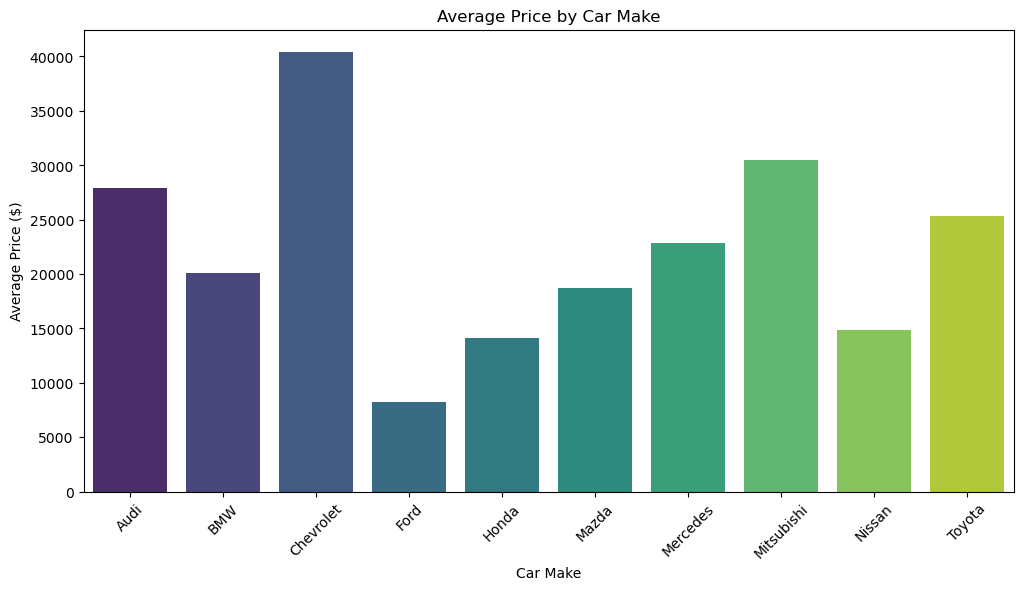

In [72]:
# Bar plot for average price by car make
plt.figure(figsize=(12, 6))
sns.barplot(x='Make', y='Price', data=Grouped_car_avg_price, palette='viridis')
plt.title('Average Price by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

In [10]:
#Costliet Car
Costliest_car_avg_price = Grouped_car_avg_price.loc[Grouped_car_avg_price['Price'].idxmax()]
print(Costliest_car_avg_price)

Make     Chevrolet
Price      40450.0
Name: 2, dtype: object


In [11]:
#Cheapest Car
Cheapest_car_avg_price = Grouped_car_avg_price.loc[Grouped_car_avg_price['Price'].idxmin()]
print(Cheapest_car_avg_price)

Make       Ford
Price    8246.5
Name: 3, dtype: object


3. Which fuel type car has the highest average price?

In [12]:
#Grouping the fuel type according to their avg price
grouped_fuel_type_avg_price = car.groupby('Fuel Type')['Price'].mean().reset_index()
print(grouped_fuel_type_avg_price)

  Fuel Type         Price
0    Diesel  20199.416667
1       Gas  24979.230769


In [13]:
# Highest avg price of fule type
highest_avg_fuel_type = grouped_fuel_type_avg_price.loc[grouped_fuel_type_avg_price['Price'].idxmax()]
print(highest_avg_fuel_type)

Fuel Type             Gas
Price        24979.230769
Name: 1, dtype: object


4. For the given dataset, construct the following contingency table (take “make” as row
 variable)

In [14]:
contingency_table = pd.crosstab(car['Make'], car['Fuel Type'])
print(contingency_table)

Fuel Type   Diesel  Gas
Make                   
Audi             2    1
BMW              4    0
Chevrolet        0    1
Ford             0    2
Honda            0    1
Mazda            2    1
Mercedes         1    2
Mitsubishi       1    2
Nissan           0    1
Toyota           2    2


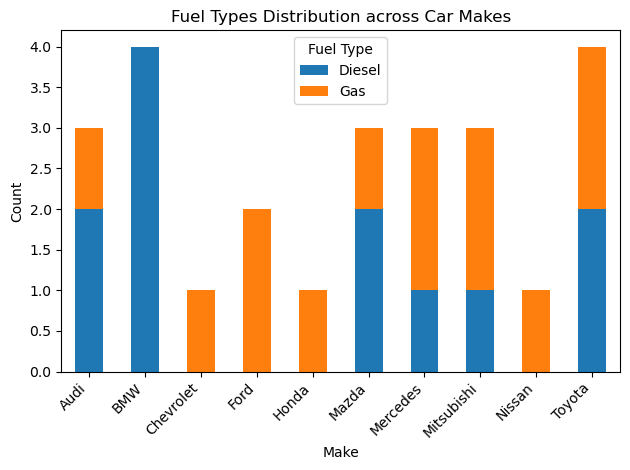

In [15]:
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Fuel Types Distribution across Car Makes')
plt.legend(title='Fuel Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

5. What is the probability that a randomly selected car will be a BMW?

In [16]:
#Total no. of cars
total_cars = car.shape[0]

In [17]:
#Filter the total no. of BMW cars
bmw_cars = car[car['Make'] == 'BMW'].shape[0]

In [18]:
# Probability of randomly selecting a BMW
probability_bmw = bmw_cars / total_cars
print("Probability of randomly selecting a BMW:", probability_bmw)

Probability of randomly selecting a BMW: 0.16


6. What is the probability that a randomly selected car will be an Audi?

In [19]:
#Filter the total no. of AUDI cars
audi_cars = car[car['Make'] == 'Audi'].shape[0]

In [20]:
# Probability of randomly selecting a AUDI
probability_audi = audi_cars / total_cars
print("Probability of randomly selecting a AUDI:", probability_audi)

Probability of randomly selecting a AUDI: 0.12


7. Form the null and alternate hypothesis to test whether the price of Gas cars is significantly different from that of Diesel Cars

In [21]:
from scipy import stats

In [22]:
# Split the dataset into Gas and Diesel cars
gas_prices = car[car['Fuel Type'] == 'Gas']['Price']
diesel_prices = car[car['Fuel Type'] == 'Diesel']['Price']

In [42]:
# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(gas_prices, diesel_prices)

In [49]:
t_stat, p_value

(1.1236308256408953, 0.27276131360711153)

8.  Form the null and alternate hypothesis and find the p-value.At 0.05 level of significance, is the price of gas cars significantly different from that of diesel cars?

In [26]:
gas_prices = car[car['Fuel Type'] == 'Gas']['Price']
diesel_prices = car[car['Fuel Type'] == 'Diesel']['Price']

In [27]:
t_stat, p_value = stats.ttest_ind(gas_prices, diesel_prices)

In [48]:
print("Null Hypothesis (H0): The mean price of gas cars is equal to the mean price of diesel cars.")
print("Alternative Hypothesis (H1): The mean price of gas cars is different from the mean price of diesel cars.")
print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Null Hypothesis (H0): The mean price of gas cars is equal to the mean price of diesel cars.
Alternative Hypothesis (H1): The mean price of gas cars is different from the mean price of diesel cars.

t-statistic: 1.1236
p-value: 0.2728


In [51]:
# Check if the result is significant at 0.05 level
alpha = 0.05
if p_value < alpha:
    print(f"\nAt {alpha} level of significance, we reject the null hypothesis.")
    print("The price of gas cars is significantly different from that of diesel cars.")
else:
    print(f"\nAt {alpha} level of significance, we fail to reject the null hypothesis.")
    print("There is not enough evidence to conclude that the price of gas cars is significantly different from that of diesel cars.")


At 0.05 level of significance, we fail to reject the null hypothesis.
There is not enough evidence to conclude that the price of gas cars is significantly different from that of diesel cars.


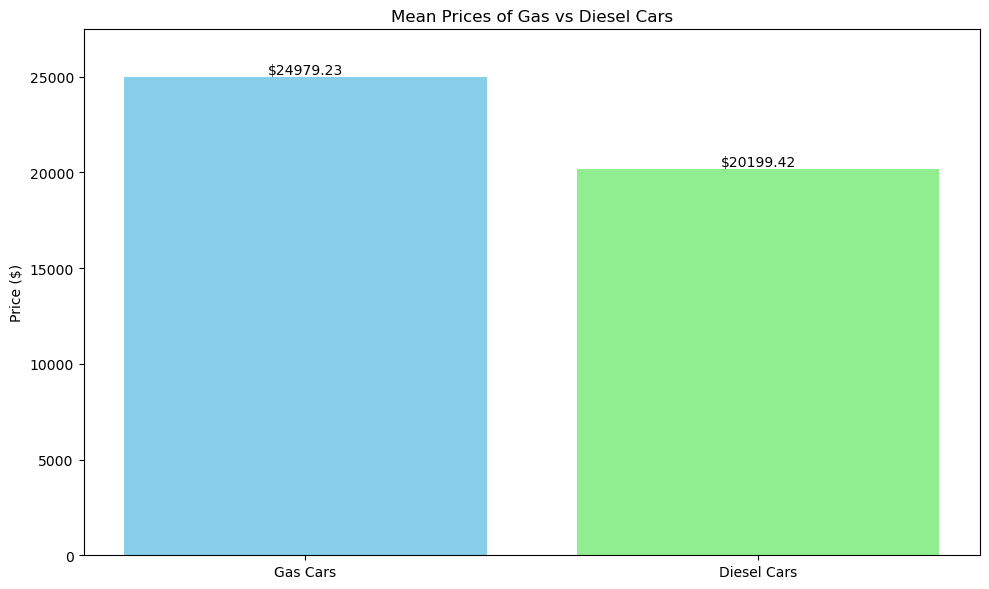

In [56]:
# Calculate mean prices
mean_gas_price = gas_prices.mean()
mean_diesel_price = diesel_prices.mean()

# Bar plot for mean prices of gas vs diesel cars
plt.figure(figsize=(10, 6))
plt.bar(['Gas Cars', 'Diesel Cars'], [mean_gas_price, mean_diesel_price], color=['skyblue', 'lightgreen'])
plt.title('Mean Prices of Gas vs Diesel Cars')
plt.ylabel('Price ($)')
plt.ylim(0, max(mean_gas_price, mean_diesel_price) * 1.1)  # Set y-axis limit with some padding
plt.text(0, mean_gas_price, f'${mean_gas_price:.2f}', ha='center', va='bottom')
plt.text(1, mean_diesel_price, f'${mean_diesel_price:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

9. . Suppose you randomly select a car from this dataset. What is the probability that it is a 'Luxury Car' ?
 ( consider BMW, Mercedes and Audi as a luxary car under the column Make )

In [57]:
#List of Luxury car brands
luxury_brands = ['BMW', 'Mercedes', 'Audi']

In [58]:
#Filter the total no. of luxury cars
luxury_cars = car[car['Make'].isin(luxury_brands)].shape[0]

In [59]:
# Probability of randomly selecting a Luxury cars
probability_luxury_car = luxury_cars / total_cars
print("Probability of randomly selecting a luxury car:", probability_luxury_car)

Probability of randomly selecting a luxury car: 0.4


10. You want to select a subset of three unique cars from the dataset to participate in a race. How many different ways can you arrange the cars in the race, considering their 'Make' as the criteria?

In [60]:
# Import factorial function to calculate permutations
from math import factorial

In [61]:
# Extract unique makes
unique_makes = car['Make'].unique()
n = len(unique_makes)
k = 3

In [62]:
# Calculate permutations according the formula " p(n,k) = n! / (n-k!) "
permutation = factorial(n) // factorial(n-k)
print(f"The number of different ways to arrange three unique cars based on their 'Make' is {permutation}")

The number of different ways to arrange three unique cars based on their 'Make' is 720


11. If you randomly pick a car with 8 cylinders, what is the probability that BMW?

In [63]:
#Filter and total number of car with "Eight" cylinders
eight_cylinder_cars = car[car['Number of Cylinders'] == 'Eight']
total_eight_cylinder_car = eight_cylinder_cars.shape[0]

In [64]:
#filter and total number of BMW car with "Eight" cylinder
eight_cylinder_BMW = eight_cylinder_cars[eight_cylinder_cars['Make'] == 'BMW'].shape[0]

In [65]:
#Calculate the probability
probability_eight_cylinder_BMW = eight_cylinder_BMW / total_eight_cylinder_car
print( f"The probability that a randomly selected car with 8 cylinders is a BMW is {probability_eight_cylinder_BMW}")

The probability that a randomly selected car with 8 cylinders is a BMW is 0.4


12. You are conducting a random survey by selecting 7 cars from the dataset. Calculate the probability that exactly 3 out of the 7 selected cars have 'Turbo' aspiration.

In [66]:
from scipy.stats import binom

In [67]:
total_cars = len(car)
turbo_cars = len(car[car['Aspiration'] == 'Turbo'])
p_turbo = turbo_cars / total_cars

In [68]:
n = 7  # number of cars selected
k = 3  # number of 'Turbo' cars we want
probability = binom.pmf(k, n, p_turbo)

In [69]:
print(f"Probability of selecting exactly 3 'Turbo' cars out of 7: {probability:.4f}")

Probability of selecting exactly 3 'Turbo' cars out of 7: 0.2932


Aman Choudhary

Linkedin: https://www.linkedin.com/in/aman-choudhary-61a9361a0/

Email: amanchoudhary11189.ac@gmail.com